In [1]:
import awkward as ak
import matplotlib.pyplot as plt
import os, sys
import subprocess
import json
import uproot
from coffea.nanoevents import NanoEventsFactory #, ScoutingNanoAODSchema
from coffea.lookup_tools.lookup_base import lookup_base
import numpy as np
from coffea import processor, util
from hist import Hist
import hist
from coffea.analysis_tools import Weights, PackedSelection
from collections import defaultdict
import mplhep
plt.style.use(mplhep.style.CMS)

# Dijet

In [6]:
output = util.load("outfiles/2022/data/trigger_dijetv2_ScoutingPFMonitor_2022-CHS.coffea")[0]
isData = True

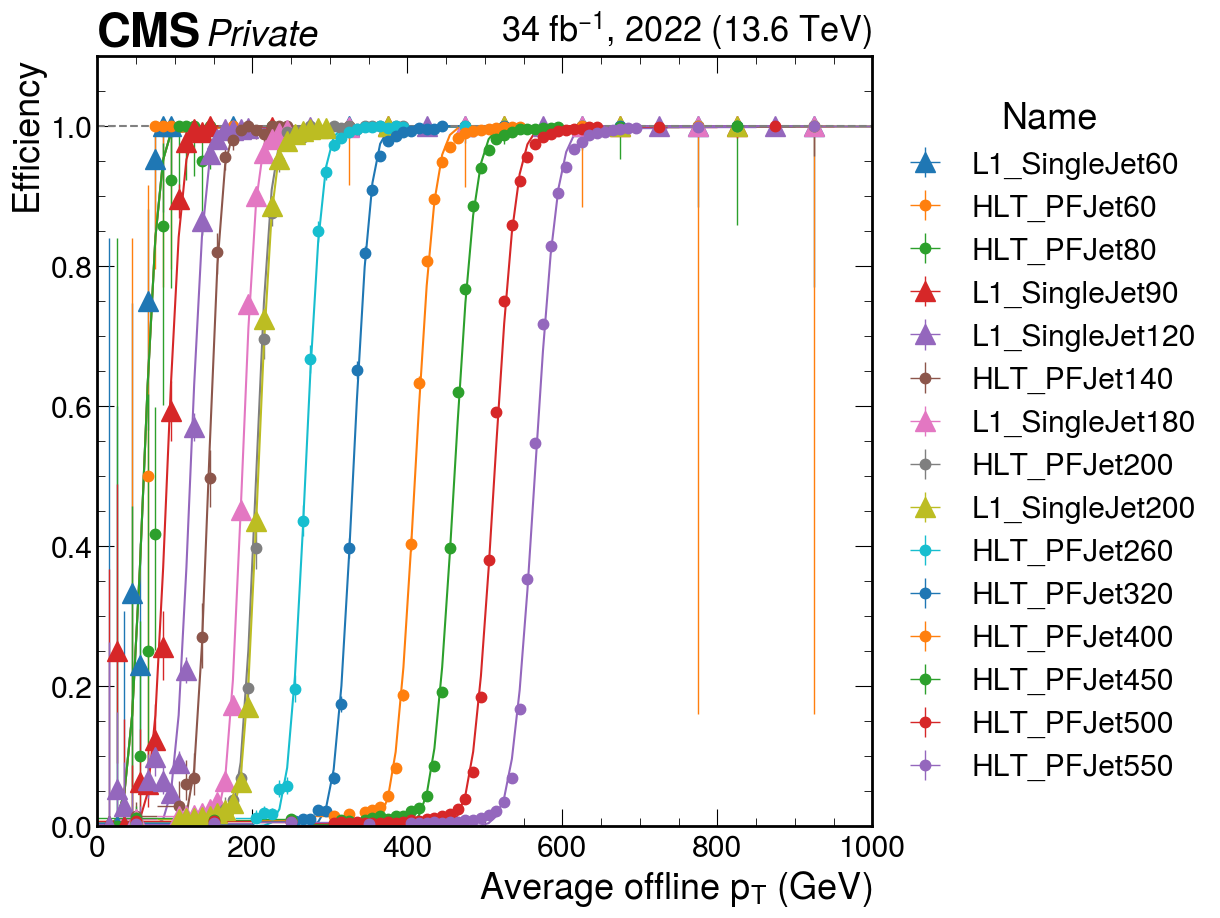

In [21]:
import warnings
warnings.filterwarnings("ignore", "invalid value encountered in divide")
from scipy import special
from iminuit import cost, Minuit
import iminuit
import re

triggers = {
            'L1_SingleJet60' : {
                "start" : {
                    "range" : (0, 50),
                    "bin" : 1, 
                },
                "mid" : {
                    "range" : (50, 100),
                    "bin" : 1,
                },
                "end" : {
                    "range" : (100, 1000),
                    "bin" : 15, 
                }
            },
                'HLT_PFJet60' : {
                "start" : {
                    "range" : (0, 50),
                    "bin" : 1, 
                },
                "mid" : {
                    "range" : (50, 100),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (100, 1000),
                    "bin" : 15, 
                }
            },
            'HLT_PFJet80' : {
                "start" : {
                    "range" : (0, 50),
                    "bin" : 1, 
                },
                "mid" : {
                    "range" : (50, 150),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (150, 1000),
                    "bin" : 15, 
                }
            },
            'L1_SingleJet90' : {
                "start" : {
                    "range" : (0, 50),
                    "bin" : 1, 
                },
                "mid" : {
                    "range" : (50, 150),
                    "bin" : 1,
                },
                "end" : {
                    "range" : (150, 1000),
                    "bin" : 15, 
                }
            },
            'L1_SingleJet120' : {
                "start" : {
                    "range" : (0, 50),
                    "bin" : 1, 
                },
                "mid" : {
                    "range" : (50, 200),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (200, 1000),
                    "bin" : 15, 
                }
            },
            'HLT_PFJet140' : {
                "start" : {
                    "range" : (0, 100),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (100, 250),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (250, 1000),
                    "bin" : 15, 
                }
            },
            'L1_SingleJet180' : {
                "start" : {
                    "range" : (0, 100),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (100, 250),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (250, 1000),
                    "bin" : 15, 
                }
            },
            'HLT_PFJet200' : {
                "start" : {
                    "range" : (0, 100),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (100, 400),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (400, 1000),
                    "bin" : 15, 
                }
            },
                'L1_SingleJet200' : {
                "start" : {
                    "range" : (0, 100),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (100, 300),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (300, 1000),
                    "bin" : 15, 
                }
            },
            'HLT_PFJet260' : {
                "start" : {
                    "range" : (0, 200),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (200, 400),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (400, 1000),
                    "bin" : 15, 
                }
            },
            'HLT_PFJet320' : {
                "start" : {
                    "range" : (0, 250),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (250, 450),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (450, 1000),
                    "bin" : 15, 
                }
            },
            'HLT_PFJet400' : {
                "start" : {
                    "range" : (0, 300),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (300, 550),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (550, 1000),
                    "bin" : 15, 
                }
            },
            'HLT_PFJet450' : {
                "start" : {
                    "range" : (0, 300),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (300, 600),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (600, 1000),
                    "bin" : 15, 
                }
            },
            'HLT_PFJet500' : {
                "start" : {
                    "range" : (0, 300),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (300, 650),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (650, 1000),
                    "bin" : 15, 
                }
            },
            'HLT_PFJet550' : {
                "start" : {
                    "range" : (0, 400),
                    "bin" : 10, 
                },
                "mid" : {
                    "range" : (400, 700),
                    "bin" : 1, 
                },
                "end" : {
                    "range" : (700, 1000),
                    "bin" : 15, 
                }
            },
        }

def eff_func(pt, p0, p1):
    return 0.5 * (1 + special.erf((pt - p0) / p1 / np.sqrt(2)))

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

for pt, rec in [("pt_o", "offline")]: #, ("pt_s", "scouting")
    
    thresholds = defaultdict()

    colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
    i_colour = -1

    fig, ax = plt.subplots(figsize=(10,10))

    for trigger in triggers.keys():

        i_colour = i_colour + 1 if i_colour < len(colours) -1 else 0

        if output[trigger].project("trigger").axes[0].centers.size < 1:
            continue

        ptproj = (
            output[trigger]
            .project(pt, "trigger", "dataset")
        )

        eff = []
        err1 = []
        err2 = []
        c = []

        for x_range in ["start", "mid", "end"]:

            pt_range = triggers[trigger][x_range]

            denom = ptproj[
                hist.loc(pt_range["range"][0]):hist.loc(pt_range["range"][1]), :, :
                ][
                hist.rebin(pt_range["bin"]), hist.loc("none"), sum
            ]
            num = ptproj[
                hist.loc(pt_range["range"][0]):hist.loc(pt_range["range"][1]), :, :
                ][
                hist.rebin(pt_range["bin"]), hist.loc(trigger), sum
            ]

            hist_data_mid, hist_bins = denom.to_numpy()
            hist_data_end, hist_bins = num.to_numpy()

            from scipy.stats import beta

            def binom_int(num, den, confint=0.68):
                quant = (1 - confint)/ 2.
                low = beta.ppf(quant, num, den - num + 1)
                high = beta.ppf(1 - quant, num + 1, den - num)
                return (np.nan_to_num(low), np.where(np.isnan(high), 1, high))

            # calculating efficiency
            efficiency = hist_data_end/hist_data_mid

            # getting error band
            band_low, band_high = binom_int(hist_data_end, hist_data_mid)
            error_low = efficiency - band_low
            error_high = band_high - efficiency

            # removing large errors in empty bins
            error_low[error_low == 1] = 0
            error_high[error_high == 1] = 0

            # stacking errors
            error = np.concatenate((error_low.reshape(error_low.shape[0], 1), error_high.reshape(error_high.shape[0], 1)), axis=1)

            eff =  np.concatenate((eff, efficiency))
            c = np.concatenate((c, num.axes[0].centers))
            err1 = np.concatenate((err1, error.T[0]))
            err2 = np.concatenate((err2, error.T[1]))

            data_err_opts = {
                    'linestyle': 'none',
                    'marker': '.' if "HLT" in trigger else "^",
                    'markersize': 15.,
                    'elinewidth': 1,
                }

        X = int(re.findall(r'\d+', trigger)[-1])
        
        p0s = {
            "L1_SingleJet60" : 60,
            "L1_SingleJet90" : 90,
            "L1_SingleJet120" : 120,
            "HLT_PFJet60" : 60,
            "HLT_PFJet80" : 60,
        }
        
        p0 = c[find_nearest(eff, 0.5)] if trigger not in p0s.keys() else p0s[trigger]
        least_squares = cost.LeastSquares(c, eff, err1, eff_func)
        m = Minuit(least_squares, p0=p0, p1=15)
        m.migrad()
        plt.plot(c, eff_func(c, *m.values))

        x = np.linspace(0, 1000, 1000)
        y = eff_func(x, *m.values)
        i_threshold = find_nearest(y, 0.95)
        thresholds[trigger] = 1 * round(x[i_threshold] / 1)
        
        ax.errorbar(
            c,
            eff,
            xerr=[
                [np.abs(c[i] - c[i-1]) / 2 if i > 0 else np.abs(c[i+1] - c[i]) / 2 for i, _ in enumerate(c)],
                [np.abs(c[i+1] - c[i]) / 2 if i < len(c) - 1 else np.abs(c[i] - c[i-1]) / 2 for i, _ in enumerate(c)]
            ],
            yerr=[err1, err2],
            color=colours[i_colour],
            label=trigger, # + f" ({thresholds[trigger]})",
            **data_err_opts,
        )

    mplhep.cms.label(ax=ax, data=True if isData else False, lumi=34, year="2022", com=13.6, label="Private" if isData else "")
    ax.set_xlabel(f"Average {rec} " + r"$p_T$ (GeV)")
    ax.set_ylim(0, 1.1)
    ax.axhline(y=1, linestyle="--", color="gray")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Name") # (Threshold from fit)")
    ax.set_ylabel("Efficiency")
    ax.set_xlim(0, 1000)
    fig.savefig("Temp.pdf", )

In [220]:
thresholds

defaultdict(None,
            {'HLT_PFJet60': 85,
             'HLT_PFJet80': 85,
             'HLT_PFJet140': 165,
             'HLT_PFJet200': 230,
             'HLT_PFJet260': 295,
             'HLT_PFJet320': 360,
             'HLT_PFJet400': 445,
             'HLT_PFJet450': 495,
             'HLT_PFJet500': 550,
             'HLT_PFJet550': 600})